#Acquire Data and Clean

In [219]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [220]:
import numpy as np
import pandas as pd
import csv
import time
import requests
from google.colab import files
import matplotlib.pyplot as plt
import seaborn as sns

In [221]:
path = '/content/drive/MyDrive/code testing/defense_stats.csv'

In [222]:
header = {'User-Agent': 'Mozilla/5.0 (Windows NT 10.0; Win64; x64) AppleWebKit/537.36 (KHTML, like Gecko) Chrome/102.0.5005.63 Safari/537.36'}

In [223]:
#pull website data and turn into csv file quick and dirty scraping
'''
for x in range(2000,2022):
  url = f'https://www.footballdb.com/stats/teamstat.html?lg=NFL&yr={x}&type=reg&cat=T&group=D&conf='
  r = requests.get(url, headers=header)
  df = pd.read_html(r.text)
  df = df[0]
  df['Year'] = x
  with open(path, 'a', encoding = 'utf-8-sig') as f:
    df.to_csv(f)
  time.sleep(4)
''';

sources for where my data came from<br>
https://www.footballdb.com/index.html<br>
https://www.nfl.com/

In [224]:
df = pd.read_csv('/content/drive/MyDrive/code testing/offense_stats.csv')
df

,Unnamed: 0,Team,Gms,Tot Pts,Pts/G,RushYds,RYds/G,PassYds,PYds/G,TotYds,Yds/G,Year
0,0.0,St. Louis RamsSt. Louis,16,540,33.8,1843,115.2,5232,327.0,7075,442.2,2000
1,1.0,Denver BroncosDenver,16,485,30.3,2311,144.4,4243,265.2,6554,409.6,2000
2,2.0,Indianapolis ColtsIndianapolis,16,429,26.8,1859,116.2,4282,267.6,6141,383.8,2000
3,3.0,San Francisco 49ersSan Francisco,16,388,24.2,1801,112.6,4239,264.9,6040,377.5,2000
4,4.0,Minnesota VikingsMinnesota,16,397,24.8,2129,133.1,3832,239.5,5961,372.6,2000
...,...,...,...,...,...,...,...,...,...,...,...,...
718,27.0,New Orleans SaintsNew Orleans,17,364,21.4,1991,117.1,3186,187.4,5177,304.5,2021
719,28.0,Atlanta FalconsAtlanta,17,313,18.4,1451,85.4,3713,218.4,5164,303.8,2021
720,29.0,Carolina PanthersCarolina,17,304,17.9,1842,108.4,3239,190.5,5081,298.9,2021
721,30.0,New York GiantsNY Giants,17,258,15.2,1688,99.3,3196,188.0,4884,287.3,2021


In [225]:
df = df.drop_duplicates()

In [226]:
df = df.drop(index=31)

In [227]:
df = df.drop(columns=['Unnamed: 0'])

In [228]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 702 entries, 0 to 722
Data columns (total 11 columns):
 #   Column   Non-Null Count  Dtype 
---  ------   --------------  ----- 
 0   Team     702 non-null    object
 1   Gms      702 non-null    object
 2   Tot Pts  702 non-null    object
 3   Pts/G    702 non-null    object
 4   RushYds  702 non-null    object
 5   RYds/G   702 non-null    object
 6   PassYds  702 non-null    object
 7   PYds/G   702 non-null    object
 8   TotYds   702 non-null    object
 9   Yds/G    702 non-null    object
 10  Year     702 non-null    object
dtypes: object(11)
memory usage: 65.8+ KB


In [229]:
df = df.rename(columns={'Tot\xa0Pts':'TotPts'})

In [230]:
df

,Team,Gms,TotPts,Pts/G,RushYds,RYds/G,PassYds,PYds/G,TotYds,Yds/G,Year
0,St. Louis RamsSt. Louis,16,540,33.8,1843,115.2,5232,327.0,7075,442.2,2000
1,Denver BroncosDenver,16,485,30.3,2311,144.4,4243,265.2,6554,409.6,2000
2,Indianapolis ColtsIndianapolis,16,429,26.8,1859,116.2,4282,267.6,6141,383.8,2000
3,San Francisco 49ersSan Francisco,16,388,24.2,1801,112.6,4239,264.9,6040,377.5,2000
4,Minnesota VikingsMinnesota,16,397,24.8,2129,133.1,3832,239.5,5961,372.6,2000
...,...,...,...,...,...,...,...,...,...,...,...
718,New Orleans SaintsNew Orleans,17,364,21.4,1991,117.1,3186,187.4,5177,304.5,2021
719,Atlanta FalconsAtlanta,17,313,18.4,1451,85.4,3713,218.4,5164,303.8,2021
720,Carolina PanthersCarolina,17,304,17.9,1842,108.4,3239,190.5,5081,298.9,2021
721,New York GiantsNY Giants,17,258,15.2,1688,99.3,3196,188.0,4884,287.3,2021


In [231]:
df2 = pd.read_csv('/content/drive/MyDrive/code testing/year_stats.csv')
df2

,Unnamed: 0,NFL Team,W,L,T,PCT,PF,PA,Net Pts,Home,Road,Div,Pct,Conf,Pct.1,Non-Conf,Strk,Last 5,Year
0,0.0,Los Angeles ChargersChargers,1,15,0,0.063,269,440,-171,1 - 7 - 0,0 - 8 - 0,1 - 7 - 0,0.125,1 - 11 - 0,0.083,0 - 4 - 0,4L,1 - 4 - 0,2000
1,1.0,Arizona CardinalsCardinals,3,13,0,0.188,210,443,-233,3 - 5 - 0,0 - 8 - 0,2 - 6 - 0,0.25,2 - 10 - 0,0.167,1 - 3 - 0,7L,0 - 5 - 0,2000
2,2.0,Cleveland BrownsBrowns,3,13,0,0.188,161,419,-258,2 - 6 - 0,1 - 7 - 0,2 - 8 - 0,0.2,3 - 10 - 0,0.231,0 - 3 - 0,5L,0 - 5 - 0,2000
3,3.0,Atlanta FalconsFalcons,4,12,0,0.25,252,413,-161,3 - 5 - 0,1 - 7 - 0,3 - 5 - 0,0.375,3 - 9 - 0,0.25,1 - 3 - 0,1W,1 - 4 - 0,2000
4,4.0,Cincinnati BengalsBengals,4,12,0,0.25,185,359,-174,3 - 5 - 0,1 - 7 - 0,2 - 8 - 0,0.2,3 - 10 - 0,0.231,1 - 2 - 0,1L,2 - 3 - 0,2000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
718,27.0,Kansas City Chiefs xzChiefs xz,12,5,0,0.706,480,364,116,7 - 2 - 0,5 - 3 - 0,5 - 1 - 0,0.833,7 - 5 - 0,0.583,5 - 0 - 0,1W,4 - 1 - 0,2021
719,28.0,Los Angeles Rams xzRams xz,12,5,0,0.706,460,372,88,5 - 3 - 0,7 - 2 - 0,3 - 3 - 0,0.5,8 - 4 - 0,0.667,4 - 1 - 0,1L,4 - 1 - 0,2021
720,29.0,Tennessee Titans xz*Titans xz*,12,5,0,0.706,419,354,65,7 - 2 - 0,5 - 3 - 0,5 - 1 - 0,0.833,8 - 4 - 0,0.667,4 - 1 - 0,3W,4 - 1 - 0,2021
721,30.0,Green Bay Packers xz*Packers xz*,13,4,0,0.765,450,371,79,8 - 0 - 0,5 - 4 - 0,4 - 2 - 0,0.667,9 - 3 - 0,0.75,4 - 1 - 0,1L,4 - 1 - 0,2021


In [232]:
df2 = df2.drop_duplicates()

In [233]:
df2 = df2.drop(index=31)

In [234]:
df2

,Unnamed: 0,NFL Team,W,L,T,PCT,PF,PA,Net Pts,Home,Road,Div,Pct,Conf,Pct.1,Non-Conf,Strk,Last 5,Year
0,0.0,Los Angeles ChargersChargers,1,15,0,0.063,269,440,-171,1 - 7 - 0,0 - 8 - 0,1 - 7 - 0,0.125,1 - 11 - 0,0.083,0 - 4 - 0,4L,1 - 4 - 0,2000
1,1.0,Arizona CardinalsCardinals,3,13,0,0.188,210,443,-233,3 - 5 - 0,0 - 8 - 0,2 - 6 - 0,0.25,2 - 10 - 0,0.167,1 - 3 - 0,7L,0 - 5 - 0,2000
2,2.0,Cleveland BrownsBrowns,3,13,0,0.188,161,419,-258,2 - 6 - 0,1 - 7 - 0,2 - 8 - 0,0.2,3 - 10 - 0,0.231,0 - 3 - 0,5L,0 - 5 - 0,2000
3,3.0,Atlanta FalconsFalcons,4,12,0,0.25,252,413,-161,3 - 5 - 0,1 - 7 - 0,3 - 5 - 0,0.375,3 - 9 - 0,0.25,1 - 3 - 0,1W,1 - 4 - 0,2000
4,4.0,Cincinnati BengalsBengals,4,12,0,0.25,185,359,-174,3 - 5 - 0,1 - 7 - 0,2 - 8 - 0,0.2,3 - 10 - 0,0.231,1 - 2 - 0,1L,2 - 3 - 0,2000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
718,27.0,Kansas City Chiefs xzChiefs xz,12,5,0,0.706,480,364,116,7 - 2 - 0,5 - 3 - 0,5 - 1 - 0,0.833,7 - 5 - 0,0.583,5 - 0 - 0,1W,4 - 1 - 0,2021
719,28.0,Los Angeles Rams xzRams xz,12,5,0,0.706,460,372,88,5 - 3 - 0,7 - 2 - 0,3 - 3 - 0,0.5,8 - 4 - 0,0.667,4 - 1 - 0,1L,4 - 1 - 0,2021
720,29.0,Tennessee Titans xz*Titans xz*,12,5,0,0.706,419,354,65,7 - 2 - 0,5 - 3 - 0,5 - 1 - 0,0.833,8 - 4 - 0,0.667,4 - 1 - 0,3W,4 - 1 - 0,2021
721,30.0,Green Bay Packers xz*Packers xz*,13,4,0,0.765,450,371,79,8 - 0 - 0,5 - 4 - 0,4 - 2 - 0,0.667,9 - 3 - 0,0.75,4 - 1 - 0,1L,4 - 1 - 0,2021


In [235]:
df2 = df2[['W', 'L','NFL Team','PF','Year']]

In [236]:
df2.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 702 entries, 0 to 722
Data columns (total 5 columns):
 #   Column    Non-Null Count  Dtype 
---  ------    --------------  ----- 
 0   W         702 non-null    object
 1   L         702 non-null    object
 2   NFL Team  702 non-null    object
 3   PF        702 non-null    object
 4   Year      702 non-null    object
dtypes: object(5)
memory usage: 32.9+ KB


In [237]:
nfl_teams = ['Cardinals','Falcons','Ravens','Bills','Panthers','Bears','Bengals',
             'Browns','Cowboys','Broncos','Lions','Packers','Texans','Colts','Jaguars',
             'Chiefs','Raiders','Chargers','Rams','Dolphins','Vikings','Patriots','Saints',
             'Giants','Jets','Eagles','Steelers','49ers','Seahawks','Buccaneers',
             'Titans','Commanders']

In [238]:
#Team Name fixing that way can merge my data frames
for name in nfl_teams:
  df.loc[df['Team'].str.contains(name), 'Team'] = name
  df2.loc[df2['NFL Team'].str.contains(name), 'NFL Team'] = name

/usr/local/lib/python3.7/dist-packages/pandas/core/indexing.py:1732: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self._setitem_single_block(indexer, value, name)
/usr/local/lib/python3.7/dist-packages/pandas/core/indexing.py:723: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  iloc._setitem_with_indexer(indexer, value, self.name)


In [239]:
df2['NFL Team'].value_counts()

Chargers      22
Cardinals     22
Titans        22
Giants        22
Raiders       22
Ravens        22
Eagles        22
Vikings       22
Dolphins      22
Broncos       22
Buccaneers    22
Saints        22
Rams          22
Colts         22
Steelers      22
Jets          22
Packers       22
Lions         22
Commanders    22
Bills         22
Chiefs        22
Jaguars       22
Panthers      22
Seahawks      22
49ers         22
Patriots      22
Cowboys       22
Bears         22
Bengals       22
Falcons       22
Browns        22
Texans        20
Name: NFL Team, dtype: int64

In [240]:
df['Team'].value_counts()

Rams                                  22
Broncos                               22
Browns                                22
Falcons                               22
Bengals                               22
Chargers                              22
Lions                                 22
Dolphins                              22
Cowboys                               22
Cardinals                             22
Bears                                 22
Patriots                              22
Buccaneers                            22
Panthers                              22
Seahawks                              22
Steelers                              22
Eagles                                22
Ravens                                22
Packers                               22
Titans                                22
Giants                                22
Jets                                  22
Saints                                22
Bills                                 22
Chiefs          

In [241]:
df['Team'].replace({'Washington RedskinsWashington':'Commanders','Washington Football TeamWashington':'Commanders'}, inplace=True)

In [242]:
#merge dataframe to show wins and losses
df = pd.merge(df, df2, suffixes=['_l','_r'], left_on=['Team','Year'], right_on=['NFL Team','Year'])

In [243]:
df = df.drop(columns=['NFL Team','PF'])
df

,Team,Gms,TotPts,Pts/G,RushYds,RYds/G,PassYds,PYds/G,TotYds,Yds/G,Year,W,L
0,Rams,16,540,33.8,1843,115.2,5232,327.0,7075,442.2,2000,10,6
1,Broncos,16,485,30.3,2311,144.4,4243,265.2,6554,409.6,2000,11,5
2,Colts,16,429,26.8,1859,116.2,4282,267.6,6141,383.8,2000,10,6
3,49ers,16,388,24.2,1801,112.6,4239,264.9,6040,377.5,2000,6,10
4,Vikings,16,397,24.8,2129,133.1,3832,239.5,5961,372.6,2000,11,5
...,...,...,...,...,...,...,...,...,...,...,...,...,...
697,Saints,17,364,21.4,1991,117.1,3186,187.4,5177,304.5,2021,9,8
698,Falcons,17,313,18.4,1451,85.4,3713,218.4,5164,303.8,2021,7,10
699,Panthers,17,304,17.9,1842,108.4,3239,190.5,5081,298.9,2021,5,12
700,Giants,17,258,15.2,1688,99.3,3196,188.0,4884,287.3,2021,4,13


In [244]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 702 entries, 0 to 701
Data columns (total 13 columns):
 #   Column   Non-Null Count  Dtype 
---  ------   --------------  ----- 
 0   Team     702 non-null    object
 1   Gms      702 non-null    object
 2   TotPts   702 non-null    object
 3   Pts/G    702 non-null    object
 4   RushYds  702 non-null    object
 5   RYds/G   702 non-null    object
 6   PassYds  702 non-null    object
 7   PYds/G   702 non-null    object
 8   TotYds   702 non-null    object
 9   Yds/G    702 non-null    object
 10  Year     702 non-null    object
 11  W        702 non-null    object
 12  L        702 non-null    object
dtypes: object(13)
memory usage: 76.8+ KB


In [245]:
#decided to add defensive stats in as well going to load then clean/fix and merge all together
defense_df = pd.read_csv('/content/drive/MyDrive/code testing/defense_stats.csv')
defense_df

,Unnamed: 0,Team,Gms,Tot Pts,Pts/G,RushYds,RYds/G,PassYds,PYds/G,TotYds,Yds/G,Year
0,0.0,Tennessee TitansTennessee,16,191,11.9,1390,86.9,2423,151.4,3813,238.3,2000
1,1.0,Baltimore RavensBaltimore,16,165,10.3,970,60.6,2997,187.3,3967,247.9,2000
2,2.0,Buffalo BillsBuffalo,16,350,21.9,1559,97.4,2867,179.2,4426,276.6,2000
3,3.0,Washington RedskinsWashington,16,269,16.8,1853,115.8,2621,163.8,4474,279.6,2000
4,4.0,New York GiantsNY Giants,16,246,15.4,1156,72.2,3390,211.9,4546,284.1,2000
...,...,...,...,...,...,...,...,...,...,...,...,...
718,27.0,Seattle SeahawksSeattle,17,366,21.5,1932,113.6,4513,265.5,6445,379.1,2021
719,28.0,Detroit LionsDetroit,17,467,27.5,2296,135.1,4160,244.7,6456,379.8,2021
720,29.0,Minnesota VikingsMinnesota,17,426,25.1,2222,130.7,4300,252.9,6522,383.6,2021
721,30.0,Houston TexansHouston,17,452,26.6,2418,142.2,4117,242.2,6535,384.4,2021


In [246]:
dupes = defense_df.duplicated()
defense_df[dupes]

,Unnamed: 0,Team,Gms,Tot Pts,Pts/G,RushYds,RYds/G,PassYds,PYds/G,TotYds,Yds/G,Year
63,NaN,Team,Gms,Tot Pts,Pts/G,RushYds,RYds/G,PassYds,PYds/G,TotYds,Yds/G,Year
96,NaN,Team,Gms,Tot Pts,Pts/G,RushYds,RYds/G,PassYds,PYds/G,TotYds,Yds/G,Year
129,NaN,Team,Gms,Tot Pts,Pts/G,RushYds,RYds/G,PassYds,PYds/G,TotYds,Yds/G,Year
162,NaN,Team,Gms,Tot Pts,Pts/G,RushYds,RYds/G,PassYds,PYds/G,TotYds,Yds/G,Year
195,NaN,Team,Gms,Tot Pts,Pts/G,RushYds,RYds/G,PassYds,PYds/G,TotYds,Yds/G,Year
228,NaN,Team,Gms,Tot Pts,Pts/G,RushYds,RYds/G,PassYds,PYds/G,TotYds,Yds/G,Year
261,NaN,Team,Gms,Tot Pts,Pts/G,RushYds,RYds/G,PassYds,PYds/G,TotYds,Yds/G,Year
294,NaN,Team,Gms,Tot Pts,Pts/G,RushYds,RYds/G,PassYds,PYds/G,TotYds,Yds/G,Year
327,NaN,Team,Gms,Tot Pts,Pts/G,RushYds,RYds/G,PassYds,PYds/G,TotYds,Yds/G,Year
360,NaN,Team,Gms,Tot Pts,Pts/G,RushYds,RYds/G,PassYds,PYds/G,TotYds,Yds/G,Year


In [247]:
defense_df = defense_df.drop_duplicates()

In [248]:
defense_df = defense_df.drop(index=31)

In [249]:
defense_df = defense_df.rename(columns={'PassYds':'PassYdsAllowed','Pts/G':'Pts/G_Allowed','PYds/G':'PYds/G_Allowed','RushYds':'RushYdsAllowed',
                                'RYds/G':'RYds/G_Allowed','Tot\xa0Pts':'TotPtsAllowed','TotYds':'TotYdsAllowed',
                                'Yds/G':'Yds/G_Allowed'})

In [250]:
defense_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 702 entries, 0 to 722
Data columns (total 12 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   Unnamed: 0      702 non-null    float64
 1   Team            702 non-null    object 
 2   Gms             702 non-null    object 
 3   TotPtsAllowed   702 non-null    object 
 4   Pts/G_Allowed   702 non-null    object 
 5   RushYdsAllowed  702 non-null    object 
 6   RYds/G_Allowed  702 non-null    object 
 7   PassYdsAllowed  702 non-null    object 
 8   PYds/G_Allowed  702 non-null    object 
 9   TotYdsAllowed   702 non-null    object 
 10  Yds/G_Allowed   702 non-null    object 
 11  Year            702 non-null    object 
dtypes: float64(1), object(11)
memory usage: 71.3+ KB


In [251]:
for name in nfl_teams:
  defense_df.loc[defense_df['Team'].str.contains(name), 'Team'] = name

In [252]:
defense_df['Team'].replace({'Washington RedskinsWashington':'Commanders','Washington Football TeamWashington':'Commanders'}, inplace=True)
defense_df['Team'].value_counts()

Titans        22
Ravens        22
Seahawks      22
Cardinals     22
49ers         22
Vikings       22
Panthers      22
Browns        22
Falcons       22
Broncos       22
Rams          22
Bengals       22
Colts         22
Patriots      22
Cowboys       22
Chiefs        22
Raiders       22
Bears         22
Packers       22
Lions         22
Chargers      22
Jaguars       22
Eagles        22
Jets          22
Buccaneers    22
Saints        22
Steelers      22
Dolphins      22
Giants        22
Commanders    22
Bills         22
Texans        20
Name: Team, dtype: int64

In [253]:
defense_df = defense_df.drop(columns=['Unnamed: 0'])
defense_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 702 entries, 0 to 722
Data columns (total 11 columns):
 #   Column          Non-Null Count  Dtype 
---  ------          --------------  ----- 
 0   Team            702 non-null    object
 1   Gms             702 non-null    object
 2   TotPtsAllowed   702 non-null    object
 3   Pts/G_Allowed   702 non-null    object
 4   RushYdsAllowed  702 non-null    object
 5   RYds/G_Allowed  702 non-null    object
 6   PassYdsAllowed  702 non-null    object
 7   PYds/G_Allowed  702 non-null    object
 8   TotYdsAllowed   702 non-null    object
 9   Yds/G_Allowed   702 non-null    object
 10  Year            702 non-null    object
dtypes: object(11)
memory usage: 65.8+ KB


In [254]:
df = pd.merge(df, defense_df, suffixes=['_l','_r'], left_on=['Team','Year'], right_on=['Team','Year'])

In [255]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 702 entries, 0 to 701
Data columns (total 22 columns):
 #   Column          Non-Null Count  Dtype 
---  ------          --------------  ----- 
 0   Team            702 non-null    object
 1   Gms_l           702 non-null    object
 2   TotPts          702 non-null    object
 3   Pts/G           702 non-null    object
 4   RushYds         702 non-null    object
 5   RYds/G          702 non-null    object
 6   PassYds         702 non-null    object
 7   PYds/G          702 non-null    object
 8   TotYds          702 non-null    object
 9   Yds/G           702 non-null    object
 10  Year            702 non-null    object
 11  W               702 non-null    object
 12  L               702 non-null    object
 13  Gms_r           702 non-null    object
 14  TotPtsAllowed   702 non-null    object
 15  Pts/G_Allowed   702 non-null    object
 16  RushYdsAllowed  702 non-null    object
 17  RYds/G_Allowed  702 non-null    object
 18  PassYdsAll

In [256]:
#changing data type to prepare for eda
df = df.astype({'TotPts': int,'Pts/G': float,'RushYds': int,'RYds/G': float,
                'PassYds': int,'PYds/G': float,'TotYds': int,'Yds/G': float,'TotPtsAllowed': int,
                'Pts/G_Allowed': float,'RushYdsAllowed': int,'RYds/G_Allowed': float,
                'PassYdsAllowed': int,'PYds/G_Allowed': float,'TotYdsAllowed': int,'Yds/G_Allowed': float,
                'W': int,'L': int})

In [257]:
df = df.drop(columns=['Gms_l','Gms_r'])

In [258]:
df.info()
df

<class 'pandas.core.frame.DataFrame'>
Int64Index: 702 entries, 0 to 701
Data columns (total 20 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   Team            702 non-null    object 
 1   TotPts          702 non-null    int64  
 2   Pts/G           702 non-null    float64
 3   RushYds         702 non-null    int64  
 4   RYds/G          702 non-null    float64
 5   PassYds         702 non-null    int64  
 6   PYds/G          702 non-null    float64
 7   TotYds          702 non-null    int64  
 8   Yds/G           702 non-null    float64
 9   Year            702 non-null    object 
 10  W               702 non-null    int64  
 11  L               702 non-null    int64  
 12  TotPtsAllowed   702 non-null    int64  
 13  Pts/G_Allowed   702 non-null    float64
 14  RushYdsAllowed  702 non-null    int64  
 15  RYds/G_Allowed  702 non-null    float64
 16  PassYdsAllowed  702 non-null    int64  
 17  PYds/G_Allowed  702 non-null    flo

,Team,TotPts,Pts/G,RushYds,RYds/G,PassYds,PYds/G,TotYds,Yds/G,Year,W,L,TotPtsAllowed,Pts/G_Allowed,RushYdsAllowed,RYds/G_Allowed,PassYdsAllowed,PYds/G_Allowed,TotYdsAllowed,Yds/G_Allowed
0,Rams,540,33.8,1843,115.2,5232,327.0,7075,442.2,2000,10,6,471,29.4,1697,106.1,3797,237.3,5494,343.4
1,Broncos,485,30.3,2311,144.4,4243,265.2,6554,409.6,2000,11,5,369,23.1,1598,99.9,3946,246.6,5544,346.5
2,Colts,429,26.8,1859,116.2,4282,267.6,6141,383.8,2000,10,6,326,20.4,1935,120.9,3422,213.9,5357,334.8
3,49ers,388,24.2,1801,112.6,4239,264.9,6040,377.5,2000,6,10,422,26.4,1794,112.1,3915,244.7,5709,356.8
4,Vikings,397,24.8,2129,133.1,3832,239.5,5961,372.6,2000,11,5,371,23.2,1788,111.8,3913,244.6,5701,356.3
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
697,Saints,364,21.4,1991,117.1,3186,187.4,5177,304.5,2021,9,8,335,19.7,1589,93.5,3821,224.8,5410,318.2
698,Falcons,313,18.4,1451,85.4,3713,218.4,5164,303.8,2021,7,10,459,27.0,2242,131.9,3952,232.5,6194,364.4
699,Panthers,304,17.9,1842,108.4,3239,190.5,5081,298.9,2021,5,12,404,23.8,1935,113.8,3266,192.1,5201,305.9
700,Giants,258,15.2,1688,99.3,3196,188.0,4884,287.3,2021,4,13,416,24.5,2193,129.0,3839,225.8,6032,354.8


#EDA

In [323]:
#check to make sure data is right
year_2021 = df['Year'] == '2021'
df[year_2021]

,Team,TotPts,Pts/G,RushYds,RYds/G,PassYds,PYds/G,TotYds,Yds/G,Year,W,L,TotPtsAllowed,Pts/G_Allowed,RushYdsAllowed,RYds/G_Allowed,PassYdsAllowed,PYds/G_Allowed,TotYdsAllowed,Yds/G_Allowed
670,Cowboys,530,31.2,2119,124.6,4800,282.4,6919,407.0,2021,12,5,358,21.1,1918,112.8,4049,238.2,5967,351.0
671,Buccaneers,511,30.1,1672,98.4,5229,307.6,6901,405.9,2021,13,4,353,20.8,1573,92.5,4062,238.9,5635,331.5
672,Chiefs,480,28.2,1955,115.0,4791,281.8,6746,396.8,2021,12,5,364,21.4,1999,117.6,4273,251.4,6272,368.9
673,Chargers,474,27.9,1834,107.9,4800,282.4,6634,390.2,2021,9,8,459,27.0,2361,138.9,3761,221.2,6122,360.1
674,Bills,483,28.4,2209,129.9,4284,252.0,6493,381.9,2021,11,6,289,17.0,1866,109.8,2771,163.0,4637,272.8
675,Ravens,387,22.8,2479,145.8,3961,233.0,6440,378.8,2021,8,9,392,23.1,1436,84.5,4742,278.9,6178,363.4
676,49ers,427,25.1,2166,127.4,4221,248.3,6387,375.7,2021,10,7,365,21.5,1760,103.5,3510,206.5,5270,310.0
677,Cardinals,449,26.4,2076,122.1,4276,251.5,6352,373.6,2021,11,6,366,21.5,1952,114.8,3645,214.4,5597,329.2
678,Rams,460,27.1,1683,99.0,4642,273.1,6325,372.1,2021,12,5,372,21.9,1754,103.2,4109,241.7,5863,344.9
679,Packers,450,26.5,1900,111.8,4315,253.8,6215,365.6,2021,13,4,371,21.8,1855,109.1,3724,219.1,5579,328.2


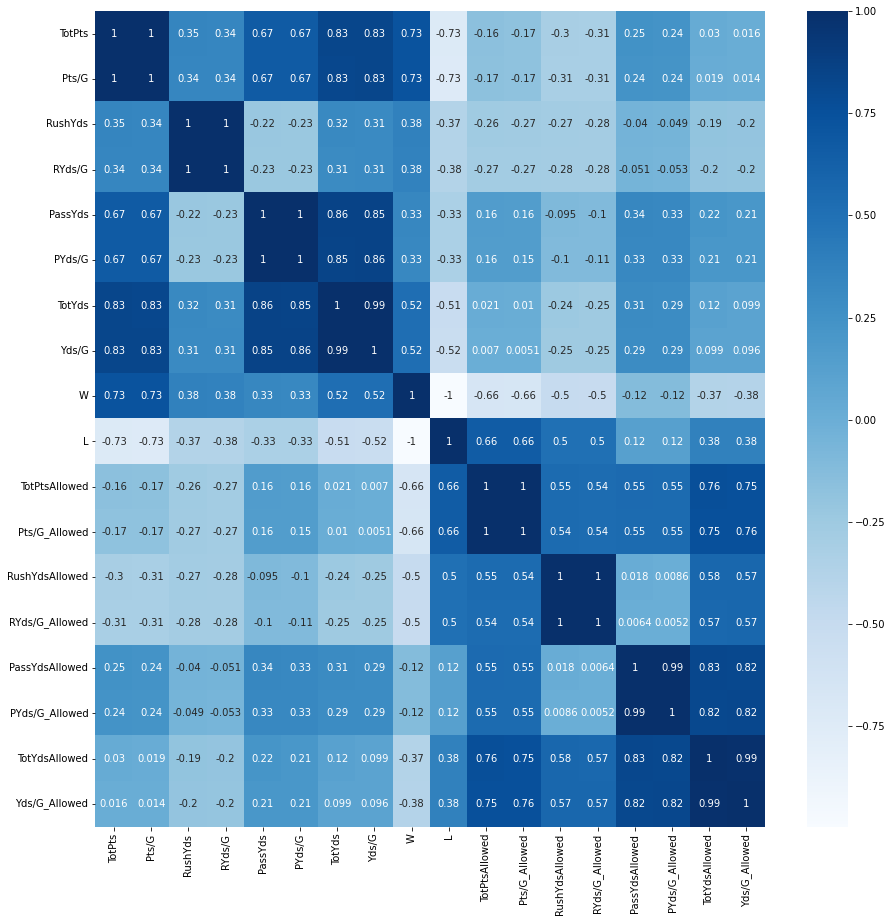

In [260]:
#heatmap showing correlations
fig = plt.figure(figsize = (15,15))
ax = fig.gca()
sns.heatmap(df.corr(),cmap='Blues',annot=True, ax=ax);

**Things I noticed right away**
<br><br>
Rush yards have a slightly higher positive correlation to wins than pass yards. Would not have guess that.
<br><br>
Rush yards allowed has a positive correlation to losing games.
<br>
It is very important to stop the run to not lose games.
<br><br>
Winning games highest positive correlation is points scored.

In [261]:
#the mean of stats grouped by how many wins
df.groupby(['W']).mean()

,TotPts,Pts/G,RushYds,RYds/G,PassYds,PYds/G,TotYds,Yds/G,L,TotPtsAllowed,Pts/G_Allowed,RushYdsAllowed,RYds/G_Allowed,PassYdsAllowed,PYds/G_Allowed,TotYdsAllowed,Yds/G_Allowed
W,,,,,,,,,,,,,,,,,
0,251.000000,15.700000,1523.000000,95.150000,3094.000000,193.400000,4617.000000,288.550000,16.000000,463.500000,28.950000,2160.000000,135.000000,3700.000000,231.200000,5860.000000,366.250000
1,255.666667,15.966667,1503.000000,93.950000,3133.333333,195.833333,4636.333333,289.783333,15.000000,444.500000,27.766667,2185.833333,136.616667,3698.166667,231.133333,5884.000000,367.733333
2,250.368421,15.642105,1665.368421,104.084211,3067.157895,191.700000,4732.526316,295.773684,14.000000,433.736842,27.115789,2180.263158,136.273684,3606.684211,225.421053,5786.947368,361.694737
3,272.500000,16.936364,1590.727273,98.809091,3328.318182,206.845455,4919.045455,305.654545,13.000000,427.590909,26.572727,2077.409091,129.095455,3679.090909,228.600000,5756.500000,357.718182
4,283.701754,17.677193,1609.578947,100.292982,3296.964912,205.407018,4906.543860,305.707018,12.000000,407.105263,25.359649,2066.228070,128.694737,3601.122807,224.268421,5667.350877,352.963158
5,294.517241,18.387931,1667.741379,104.120690,3275.741379,204.525862,4943.482759,308.643103,10.982759,386.879310,24.160345,1948.517241,121.656897,3611.775862,225.531034,5560.293103,347.187931
6,324.677419,20.275806,1784.951613,111.446774,3477.306452,217.135484,5262.258065,328.580645,9.983871,374.612903,23.388710,1914.193548,119.509677,3587.112903,224.003226,5501.306452,343.514516
7,337.941176,21.063529,1757.635294,109.521176,3564.094118,222.142353,5321.729412,331.664706,9.000000,372.223529,23.197647,1856.141176,115.667059,3703.188235,230.743529,5559.329412,346.410588
8,358.693333,22.357333,1885.760000,117.522667,3661.800000,228.298667,5547.560000,345.820000,8.000000,363.413333,22.654667,1847.240000,115.182667,3598.066667,224.262667,5445.306667,339.445333



8 wins: 93 teams won 8 games; 10 made the playoffs; 83 did not … 10.8%<br>
9 wins: 82 teams won 9 games; 43 made the playoffs; 39 did not … 52.4%<br>
10 wins: 80 teams won 10 games; 71 made the playoffs; 9 did not … 88.8%<br>
11 wins: 63 teams won 11 games; 62 made the playoffs; 1 did not … 98.4%<br>
12 wins: 47 teams won 12 games; 47 teams made the playoffs … 100%<br>
13 wins: 37 teams won 13 games; 37 teams made the playoffs … 100%<br>
14 wins: 13 teams won 14 games; 13 teams made the playoffs … 100%<br>
15 wins: 3 teams won 15 games; 3 teams made the playoffs … 100%<br>
16 wins: 1 team won 16 games; 1 team made the playoffs … 100%<br>
source for above info<br>
https://heavy.com/sports/2014/12/nfl-playoffs-prediction-stats-wins/
<br><br>
If you want 10 wins in the nfl you will need to score on average 24 points a game<br>
and only let up 20 points a game


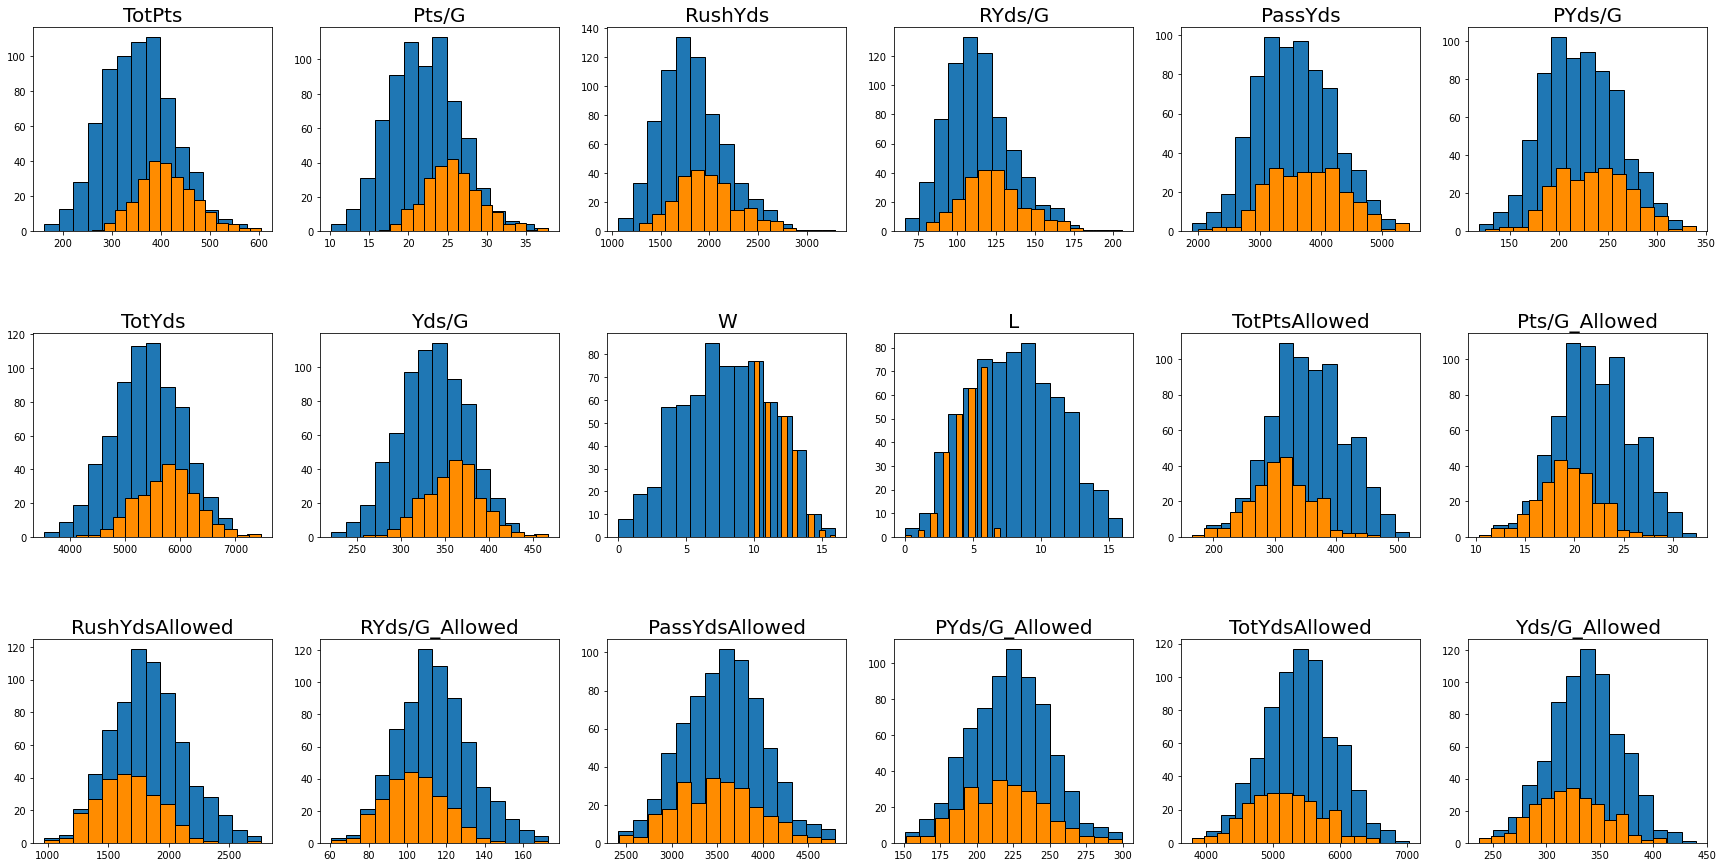

In [327]:
#hist plots of numerical stats in blue and in orange the 10 win teams same numerical stats
ten_wins = df['W'] >= 10
fig, axes = plt.subplots(3, 6, figsize=(30, 15))
plt.subplots_adjust(hspace=.5)
axes = axes.ravel()
i=0
for col in df:
  if df[col].dtype in (int,float):
    axes[i].set_title(col,size=20)
    axes[i].hist(df[col],bins=15,edgecolor='black')
    axes[i].hist(df.loc[ten_wins,col],bins=15,color='darkorange',edgecolor='black')
    i += 1

the 10 win teams have slightly better numbers all the way around.<br>
also shows just how close the gap is from bad teams to good teams in the nfl<br>